# **MODELACIÓN DE DATOS EN PYTHON**

Relizado por: **Giovanny Lopez**  
En fecha: **10 de Septiembre de 2020**

## 1. Importación de Módulos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/giovannylopezd/ANALISIS-INMOBILIARIO/master/casas_limpias.csv')
# Dividimos entre variables explicativas y la explicada
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, 6].values
X[:5,:]
print('"X" actualmente contiene',len(X[0]), 'variables')

"X" actualmente contiene 6 variables


## 2. Datos Categóricos

### 2.1. Transformación

Convertimos las variables con datos categóricos a variables **ficticias** o **dummies** 

In [3]:
# Codificamos Datos Categoricos
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])

ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [0,1])], # Posicion de las columnas a transformar
    remainder='passthrough') # Deja las otras columnas intactas

X = np.array(ct.fit_transform(X), dtype=np.float)
X[:5,:]
print('Vemos que ahora "X" contiene',len(X[0]),'variables')

Vemos que ahora "X" contiene 12 variables


### 2.2. Trampas Dummy

Se debe eliminar la primer columna generada por cada variable categórica codificada para evitar la redundancia de información, una explicación más completa puede ser encontrada en [**es.qwe.wiki**](https://es.qwe.wiki/wiki/Dummy_variable_(statistics) o una búsqueda rápida por la web.  

In [4]:
# Eliminaremos las columnas 0 y 2 que son las primeras codificadas de las variables Tipo y Zona, respectivamente.
X = np.delete(X,0,1)
X = np.delete(X,1,1)
# Ahora n
X[:5,:]
print('Una vez eliminadas, vemos que ya solo tenemos',len(X[0]),'variables')

Una vez eliminadas, vemos que ya solo tenemos 10 variables


## 3. Regresión Lineal Múltiple

### 3.1. Modelo OLS Óptimo
Para hallar el modelo de regresión óptimo (*En este caso, por Mínimos Cuadrados Ordinarios*), utilizaremos la Eliminación Hacia Atrás.  
Para eso creamos el *beta* constante en el modelo y proponemos un **nivel de significación de 0.05**

In [5]:
# Construir el modelo óptimo de RLM utilizando la Eliminación hacia atrás
import statsmodels.api as sm
X = np.append(arr = np.ones((len(X[:,0]),1)).astype(int), values = X, axis = 1)

Obtenemos un resumen del modelo con todas las variables, debemos ser cuidadosos al momento de localizar la posición de las variables en la tabla luego de transformar las variables categóricas.

In [6]:
X_opt = X[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()
# 6 y 4: Urubo y Oeste no son buenas predictoras dummy
# 7: La variable Dormitorios no aporta significativamente a la predicción

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     79.04
Date:                Thu, 10 Sep 2020   Prob (F-statistic):          6.39e-107
Time:                        22:25:03   Log-Likelihood:                -8653.1
No. Observations:                 691   AIC:                         1.733e+04
Df Residuals:                     680   BIC:                         1.738e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.365e+04   2.11e+04     -3.496      0.001   -1.15e+05   -3.23e+04
x1          5.265e+04   8706.928      6.047      0.000    3.56e+04    6.97e+04
x2          -5.32e+04   1.29e+04     -4.130      0.000   -7.85e+04   -2.79e+04
x3         -3.461e+04   1.08e+04     -3.217      0.001   -5.57e+04   -1.35e+04
x4         -2.191e+04    1.2e+04     -1.824      0.069   -4.55e+04    1679.042
x5         -5.181e+04    1.2e+04     -4.301      0.000   -7.55e+04   -2.82e+04
x6         -3624.0553   1.41e+04     -0.257      0.797   -3.13e+04     2.4e+04
x7         -2838.4483   3491.016     -0.813      0.416   -9692.914    4016.018
x8          4.208e+04   5729.907      7.345      0.000    3.08e+04    5.33e+04
x9          7701.6859   2648.353      2.908      0.004    2501.755    1.29e+04
x10          706.8173     31.809     22.221      0.000     644.362     769.273
==============================================================================
Omnibus:                       73.809   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.848
Skew:                           0.737   Prob(JB):                     1.90e-25
Kurtosis:                       4.334   Cond. No.                     2.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Debido a que 3 variables no alcanzan un nivel de significación menor a 0.05, las descartamos como predictoras del conjunto "**X**".  
Las variables 6 y 4: **Urubo y Oeste** no son buenas predictoras dummy.  
La variable 7: **Dormitorios** no aporta significativamente al modelo de predicción.

In [7]:
X_opt = X[:, [0, 1, 2, 3, 5, 8, 9, 10]] # Removemos las variables 6, 4 y 7
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     111.9
Date:                Thu, 10 Sep 2020   Prob (F-statistic):          7.19e-109
Time:                        22:25:03   Log-Likelihood:                -8655.7
No. Observations:                 691   AIC:                         1.733e+04
Df Residuals:                     683   BIC:                         1.736e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -9.23e+04   1.74e+04     -5.302      0.000   -1.26e+05   -5.81e+04
x1          5.442e+04   8380.193      6.494      0.000     3.8e+04    7.09e+04
x2         -4.202e+04   9455.643     -4.444      0.000   -6.06e+04   -2.35e+04
x3         -2.216e+04   6034.246     -3.673      0.000    -3.4e+04   -1.03e+04
x4         -4.036e+04   8437.357     -4.783      0.000   -5.69e+04   -2.38e+04
x5          4.075e+04   5652.733      7.209      0.000    2.97e+04    5.18e+04
x6          7670.4498   2623.447      2.924      0.004    2519.460    1.28e+04
x7           705.4118     30.009     23.507      0.000     646.491     764.332
==============================================================================
Omnibus:                       72.005   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.336
Skew:                           0.729   Prob(JB):                     1.81e-24
Kurtosis:                       4.293   Cond. No.                     1.98e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3.2. División de Datos
Dividimos los datos usando el conjunto **X_opt**.

In [8]:
from sklearn.model_selection import train_test_split
Xl_train, X_test, yl_train, y_test = train_test_split(X_opt, y, test_size = 0.2, random_state = 0)

### 3.3. Ajuste del Modelo

Ajuste del modelo a los nuevos datos en la división de **Entrenamiento**.

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg1 = LinearRegression()
modelo1 = lin_reg1.fit(Xl_train, yl_train)
yl_pred = lin_reg1.predict(X_test)

Tabla de datos con los precios Reales y los precios predichos por el modelo de Regresión Lineal Múltiple:

In [10]:
tabla_lin = pd.DataFrame({'Precio Real': y_test.flatten(), 'Precio Predicho': yl_pred.flatten()})

### 3.4. Visualización del Modelo Lineal Múltiple
Visualización de la predicción y el conjunto de prueba de los primeros 50 datos:

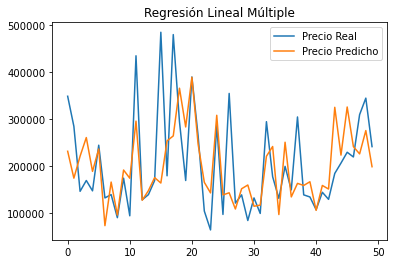

In [11]:
muestra_lin = tabla_lin.head(50)
muestra_lin.plot.line()
plt.title("Regresión Lineal Múltiple")
plt.show()

Visualización de los residuos entre los precios predichos y reales del conjunto de prueba:

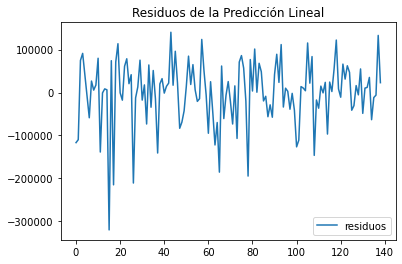

In [12]:
residuos_l = yl_pred - y_test
residuos_l =  pd.DataFrame({'residuos': residuos_l.flatten()})
residuos_l.plot()
plt.title("Residuos de la Predicción Lineal")
plt.show()

## 4. Regresión Polinómica

Usaremos un **Polinomio de Tercer Grado** que se ajuste de manera tal que no caiga en un sobreajuste.  

### 4.1. División de Datos
Dividimos los datos, pero esta vez con el conjunto **X**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### 4.2. Ajuste del Modelo

Ajustamos el modelo a los nuevos datos en la división de **Entrenamiento**.

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X_train)
lin_reg2 = LinearRegression()
modelo2 = lin_reg2.fit(X_poly, y_train)
X_poly_test = poly.fit_transform(X_test)
yp_pred = lin_reg2.predict(X_poly_test)

Tabla de datos con los precios Reales y los precios predichos por el modelo de Regresión Polinómica:

In [15]:
tabla_poly = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': yp_pred.flatten()})

### 4.3. Visualización del Modelo Polinomial
Visualización de la predicción y el conjunto de prueba de los primeros 50 datos:

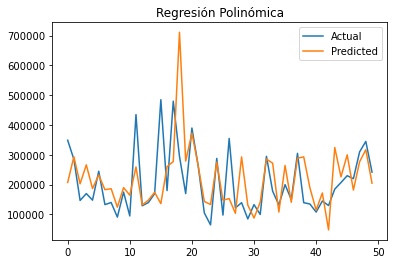

In [16]:
muestra_lin = tabla_poly.head(50)
muestra_lin.plot.line()
plt.title("Regresión Polinómica")
plt.show()

Visualización de los residuos entre los precios predichos y reales del conjunto de prueba:

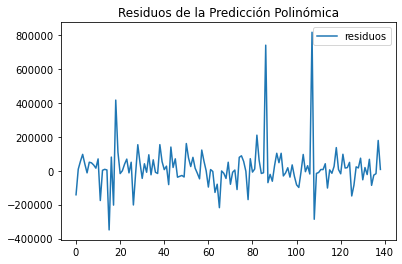

In [17]:
residuos_p = yp_pred - y_test
residuos_p =  pd.DataFrame({'residuos': residuos_p.flatten()})
residuos_p.plot()
plt.title("Residuos de la Predicción Polinómica")
plt.show()

## 5. Regresión Bosques Aleatorios
Se modelará con 500 estimadores o árboles
### 5.1. Ajuste del Modelo

In [18]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators = 500, random_state = 0)
modelo3 = forest_reg.fit(X_train,y_train)
yf_pred = forest_reg.predict(X_test)

Tabla de datos con los precios Reales y los precios predichos por el modelo de **Regresión de Bosques Aleatorios**:

In [19]:
tabla_forest = pd.DataFrame({'Precio Real': y_test.flatten(), 'Precio Predicho': yf_pred.flatten()})

### 5.2. Visualización del Modelo Polinomial
Visualización de la predicción y el conjunto de prueba de los primeros 50 datos:

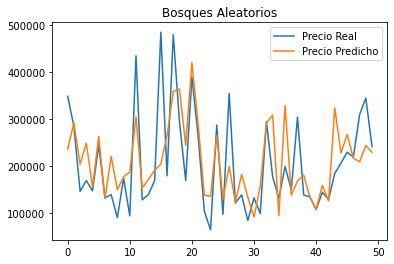

In [20]:
muestra_forest = tabla_forest.head(50)
muestra_forest.plot.line()
plt.title("Bosques Aleatorios")
plt.show()

Visualización de los residuos entre los precios predichos y reales del conjunto de prueba:

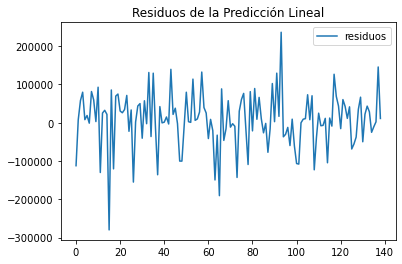

In [21]:
residuos_f = yf_pred - y_test
residuos_f =  pd.DataFrame({'residuos': residuos_f.flatten()})
residuos_f.plot()
plt.title("Residuos de la Predicción Lineal")
plt.show()

## 5 Evaluación de Modelos

In [22]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

# Regresión Lineal Múltiple
r2 = modelo1.score(Xl_train,yl_train)
print('Modelo Lineal Múltiple:')
print('Coeficiente de Determinación (R2):', round(r2*100, 2),'%')
print('Raíz del Error Cuadrático Medio (RMSE):', round((mse(y_test, yl_pred))**0.5, 2))
print('Error Absoluto Medio (MAE):', round((mae(y_test, yl_pred)), 2))

# Regresión Polinómica
r2 = modelo2.score(X_poly,y_train)
print('Modelo Polinomial:')
print('Coeficiente de Determinación (R2):', round(r2*100, 2),'%')
print('Raíz del Error Cuadrático Medio (RMSE):', round((mse(y_test, yp_pred))**0.5, 2))
print('Error Absoluto Medio (MAE):', round((mae(y_test, yp_pred)), 2))

# Regresión de Bosques Aleatorios
r2 = modelo3.score(X_train,y_train)
print('Modelo Bosques Aleatorios:')
print('Coeficiente de Determinación (R2):', round(r2*100, 2),'%')
print('Raíz del Error Cuadrático Medio (RMSE):', round((mse(y_test, yf_pred))**0.5, 2))
print('Error Absoluto Medio (MAE):', round((mae(y_test, yf_pred)), 2))

Modelo Lineal Múltiple:
Coeficiente de Determinación (R2): 55.88 %
Raíz del Error Cuadrático Medio (RMSE): 74273.89
Error Absoluto Medio (MAE): 53595.21
Modelo Polinomial:
Coeficiente de Determinación (R2): 71.48 %
Raíz del Error Cuadrático Medio (RMSE): 129709.93
Error Absoluto Medio (MAE): 71381.2
Modelo Bosques Aleatorios:
Coeficiente de Determinación (R2): 92.06 %
Raíz del Error Cuadrático Medio (RMSE): 72158.53
Error Absoluto Medio (MAE): 51966.68
